In [2]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.8 MB/s eta 0:00:00


In [1]:
import pandas as pd 
import numpy as np

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

In [2]:
elon = pd.read_excel("E:/Userfiles/Desktop/elon.xlsx")

In [3]:
elon

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
elon.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [5]:
elon.shape

(1999, 2)

# Preprocessing

In [6]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def pre_process(text):
    text = str(text).lower()
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop]
    text=" ".join(text)
    text = [stemmer_func(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [10]:
elon['clean_text'] = elon['Text'].apply(lambda x: pre_process(x))

In [11]:
elon

,Unnamed: 0,Text,clean_text
0,1,@kunalb11 I’m an alien,kunalb i'm alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,3,@joerogan @Spotify Great interview!,joerogan spotifi great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestim
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber


In [12]:
elon['clean_text'].head(10)

0                                     kunalb i'm alien
1    idaacarmack ray trace cyberpunk hdr nextlevel tri
2                     joerogan spotifi great interview
3                                gtera doge underestim
4    teslacn congratul tesla china amaz execut last...
5                   happi new year ox httpstcowfkmyuoj
6    frodo underdogeal thought would failhimself ht...
7                 owenspark flcnhvi anonyx haha thank 
8    flcnhvi anonyx inde tweet definit repres realw...
9                                entertain outcom like
Name: clean_text, dtype: object

In [13]:
elon.shape

(1999, 3)

In [14]:
elon.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [15]:
elon

,Text,clean_text
0,@kunalb11 I’m an alien,kunalb i'm alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview
3,@gtera27 Doge is underestimated,gtera doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
elon['token_text'] = elon['clean_text'].apply(word_tokenize)

In [18]:
elon

,Text,clean_text,token_text
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]"
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]"
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]"


In [19]:
def lemma(text):
    lemma_token = " "
    for word in text:
        lemma = word
        lemma_token = lemma_token + " " + lemma
    return lemma_token

In [20]:
elon['Lemma_text'] = elon['token_text'].apply(lemma)
elon.head()

,Text,clean_text,token_text,Lemma_text
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]",kunalb i 'm alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...


# sentiment analysis using textblob

In [21]:
clean_data = elon['Lemma_text']

In [22]:
clean_data

0                                       kunalb i 'm alien
1         idaacarmack ray trace cyberpunk hdr nextleve...
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4         teslacn congratul tesla china amaz execut la...
                              ...                        
1994      flcnhvi true sound surreal negat propaganda ...
1995      ppathol make sure read ur term amp condit cl...
1996                       teslagong ppathol samwis gamge
1997                            ppathol altho dumb dumber
1998                                progress updat august
Name: Lemma_text, Length: 1999, dtype: object

In [23]:
elon['textblob_sentiment_polarity'] = elon["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [24]:
elon

,Text,clean_text,token_text,Lemma_text,textblob_sentiment_polarity
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]",kunalb i 'm alien,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000


In [25]:
elon['textblob_sentiment_subjectivity'] = elon["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity )
elon

,Text,clean_text,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]",kunalb i 'm alien,-0.250000,0.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000,0.750000
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000,0.033333
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667,0.443333
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000,0.888889
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000,0.500000


In [26]:
def sentiment_analysis(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
elon['sentiment_textblob'] = elon['textblob_sentiment_polarity'].apply(sentiment_analysis)

In [28]:
elon

,Text,clean_text,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]",kunalb i 'm alien,-0.250000,0.750000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000,0.750000,Positive
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000,0.033333,Neutral
...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667,0.443333,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000,0.888889,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000,0.500000,Negative


In [29]:
elon[['Text', 'textblob_sentiment_polarity','sentiment_textblob']].head(20)

,Text,textblob_sentiment_polarity,sentiment_textblob
0,@kunalb11 I’m an alien,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,Neutral
2,@joerogan @Spotify Great interview!,0.800000,Positive
3,@gtera27 Doge is underestimated,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.000000,Neutral
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.136364,Positive
6,"Frodo was the underdoge,\nAll thought he would...",0.000000,Neutral
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.200000,Positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.000000,Neutral
9,The most entertaining outcome is the most likely,0.000000,Neutral


In [30]:
def sentiment_analysis(subjectivity):
    if subjectivity < 0:
        return 'Negative'
    elif subjectivity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [31]:
elon['sentiment_textblob_sub'] = elon['textblob_sentiment_subjectivity'].apply(sentiment_analysis)

In [32]:
elon

,Text,clean_text,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob,sentiment_textblob_sub
0,@kunalb11 I’m an alien,kunalb i'm alien,"[kunalb, i, 'm, alien]",kunalb i 'm alien,-0.250000,0.750000,Negative,Positive
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000,Neutral,Neutral
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000,0.750000,Positive,Positive
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000,0.000000,Neutral,Neutral
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000,0.033333,Neutral,Positive
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667,0.443333,Positive,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000,0.888889,Positive,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000,0.000000,Neutral,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000,0.500000,Negative,Positive


In [33]:
elon[['Text', 'textblob_sentiment_subjectivity','sentiment_textblob_sub']].head(20)

,Text,textblob_sentiment_subjectivity,sentiment_textblob_sub
0,@kunalb11 I’m an alien,0.750000,Positive
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,Neutral
2,@joerogan @Spotify Great interview!,0.750000,Positive
3,@gtera27 Doge is underestimated,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.033333,Positive
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.454545,Positive
6,"Frodo was the underdoge,\nAll thought he would...",0.000000,Neutral
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.300000,Positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.000000,Neutral
9,The most entertaining outcome is the most likely,0.000000,Neutral


# Polarity

In [34]:
elon.sentiment_textblob.value_counts()

Neutral     1142
Positive     686
Negative     171
Name: sentiment_textblob, dtype: int64

<AxesSubplot:>

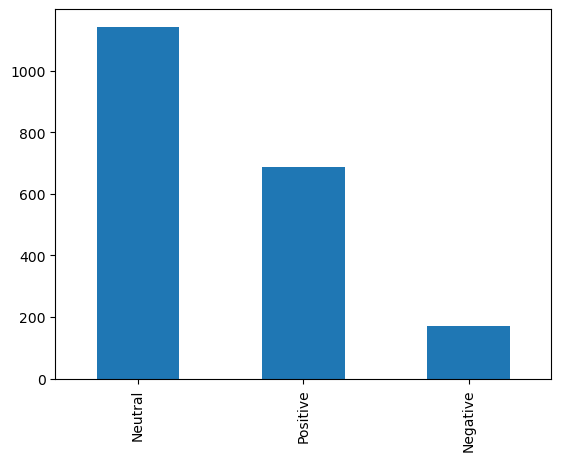

In [57]:
elon["sentiment_textblob"].value_counts().plot(kind='bar')

# Subjectivity

In [54]:
elon.sentiment_textblob_sub.value_counts()

Neutral     1058
Positive     941
Name: sentiment_textblob_sub, dtype: int64

<AxesSubplot:>

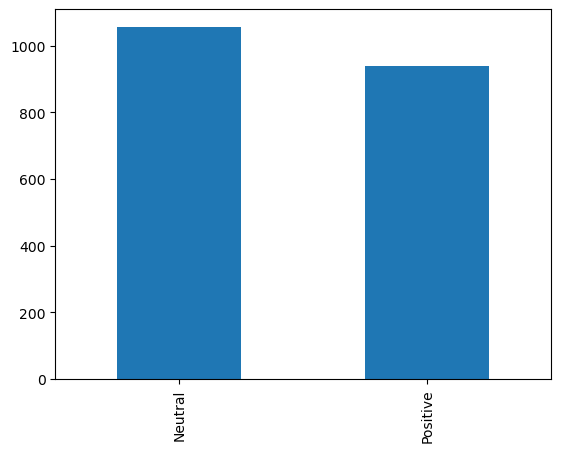

In [53]:
elon["sentiment_textblob_sub"].value_counts().plot(kind='bar')

# Word cloud

In [36]:
cleantext = elon.iloc[:,1]

In [37]:
cleantext

0                                        kunalb i'm alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal negat propaganda st...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                           ppathol altho dumb dumber 
1998                               progress updat august 
Name: clean_text, Length: 1999, dtype: object

In [38]:
text = ' '.join(cleantext)
text

"kunalb i'm alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstcowfkmyuoj frodo underdogeal thought would failhimself httpstcozgxjfdzzrm owenspark flcnhvi anonyx haha thank  flcnhvi anonyx inde tweet definit repres realworld time alloc entertain outcom like givedirect sent agre clubhous kanyewest httpstcorweuhst geoffkeighley unrealengin it get real bought dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg pleas unlock account astrojordi  true power haha httpstcofcuhqsdo freewalletorg crypto wallet won't give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstcopwt… ajtourvill yes blkmdl rationaletienn adamklotz predict cash flow reason well starlink ipo rationaletienn adamklotz starlink s

In [39]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstcowfkmyuoj frodo underdogeal thought would failhimself httpstcozgxjfdzzrm owenspark flcnhvi anonyx haha thank  flcnhvi anonyx inde tweet definit repres realworld time alloc entertain outcom like givedirect sent agre clubhous kanyewest httpstcorweuhst geoffkeighley unrealengin it get real bought dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg pleas unlock account astrojordi  true power haha httpstcofcuhqsdo freewalletorg crypto wallet wont give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstcopwt… ajtourvill yes blkmdl rationaletienn adamklotz predict cash flow reason well starlink ipo rationaletienn adamklotz starlink sta

In [40]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])


['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstcowfkmyuoj', 'frodo', 'underdogeal', 'thought', 'would', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', 'haha', 'thank', 'flcnhvi', 'anonyx', 'inde', 'tweet', 'definit', 'repres', 'realworld']


In [41]:
len(text_tokens)
#Remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstcowfkmyuoj', 'frodo', 'underdogeal', 'thought', 'would', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi']


In [43]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 1.9 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [46]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:25])

kunalb im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut last


In [47]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb', 'I', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last']


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [49]:
print(vectorizer.vocabulary_)

{'kunalb': 2438, 'alien': 98, 'idaacarmack': 2199, 'ray': 3268, 'trace': 4081, 'cyberpunk': 788, 'hdr': 1458, 'nextlevel': 2853, 'tri': 4099, 'joerogan': 2359, 'spotifi': 3722, 'great': 1398, 'interview': 2287, 'gtera': 1415, 'doge': 932, 'underestim': 4164, 'teslacn': 3932, 'congratul': 694, 'tesla': 3926, 'china': 583, 'amaz': 122, 'execut': 1131, 'last': 2457, 'year': 4412, 'next': 2852, 'even': 1106, 'happi': 1441, 'new': 2849, 'ox': 2990, 'httpstcowfkmyuoj': 2065, 'frodo': 1289, 'underdogeal': 4163, 'thought': 4006, 'would': 4388, 'failhimself': 1168, 'httpstcozgxjfdzzrm': 2149, 'owenspark': 2984, 'flcnhvi': 1234, 'anonyx': 151, 'haha': 1427, 'thank': 3968, 'inde': 2242, 'tweet': 4133, 'definit': 842, 'repre': 3344, 'realworld': 3293, 'time': 4024, 'alloc': 101, 'entertain': 1063, 'outcom': 2965, 'like': 2514, 'givedirect': 1369, 'send': 3523, 'agre': 69, 'clubhous': 625, 'kanyew': 2394, 'httpstcorweuhst': 1957, 'geoffkeighley': 1349, 'unrealengin': 4191, 'get': 1354, 'real': 3282

In [50]:
print(X.toarray().shape)

(15013, 4446)


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

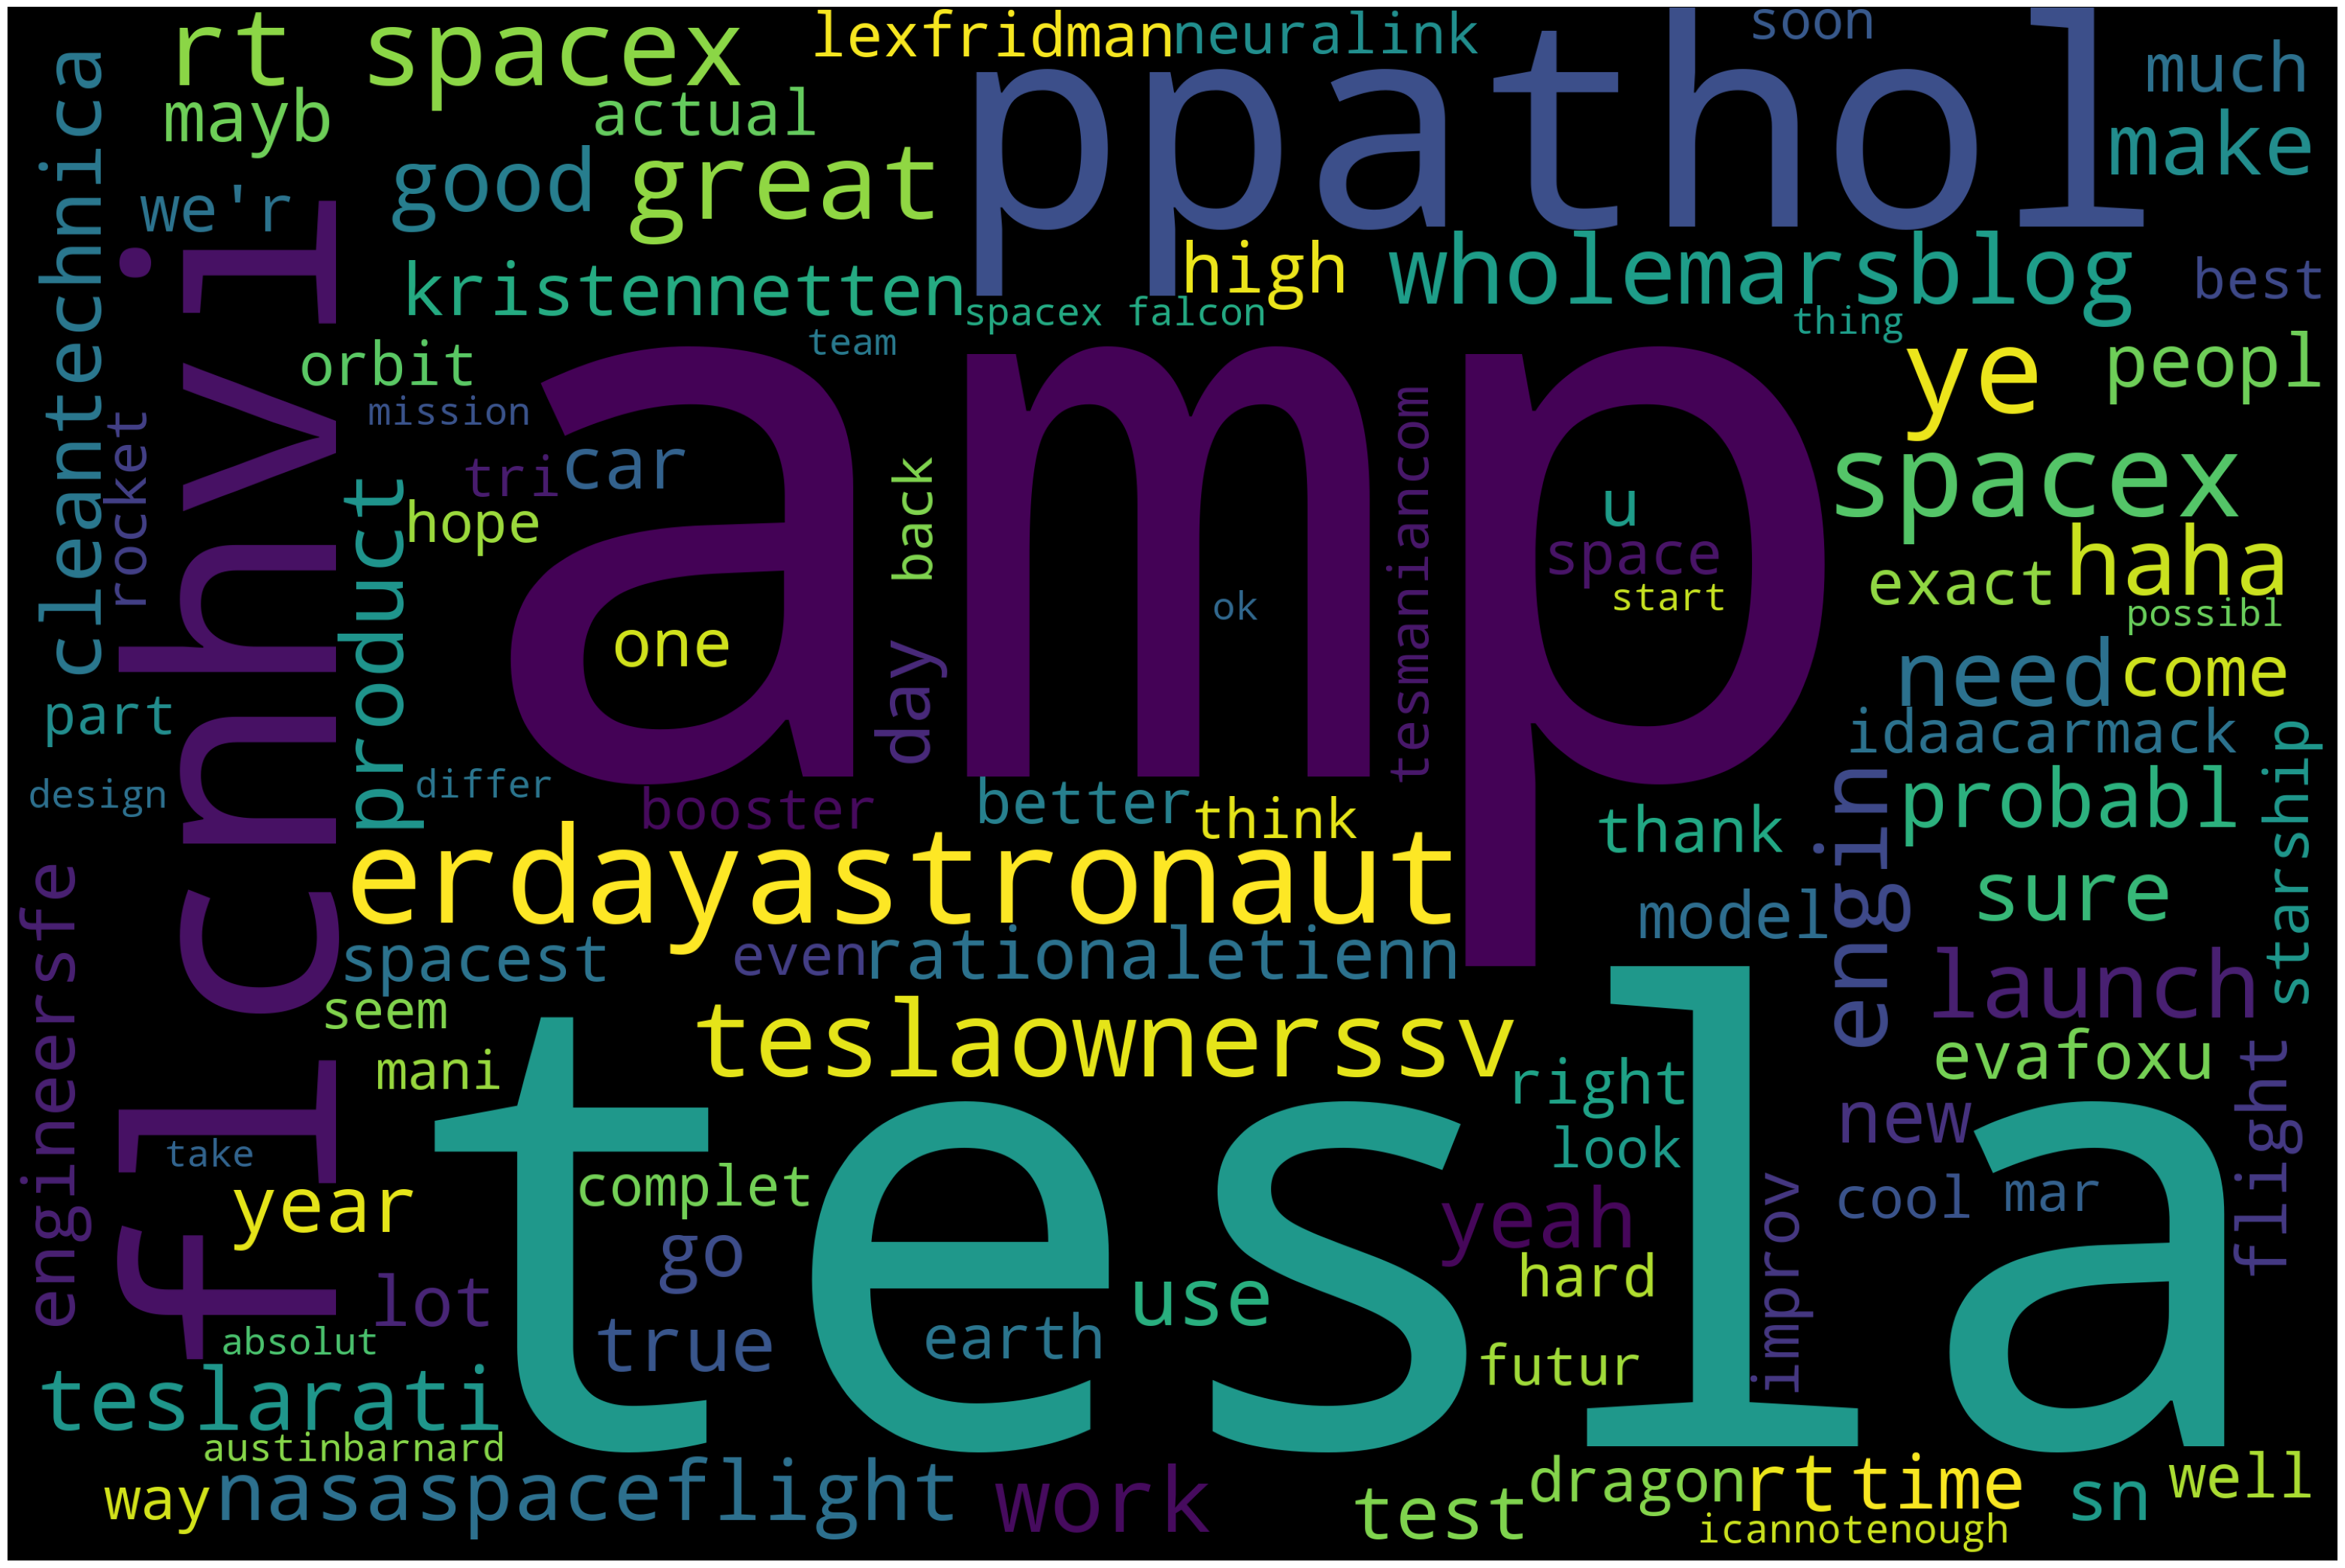

In [52]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100).generate(text)
# Plot
plot_cloud(wordcloud)